
# Image Transformation on **baboon.png** (RGB)

**Objective:** Perform pixel-wise intensity analysis and transformations, focusing on visual results.

**Steps covered**
1. Load the RGB image.
2. Create histograms for each color channel (R, G, B).
3. Adjust brightness and contrast.
4. Perform per-channel histogram equalization.
5. Convert to grayscale and plot its histogram.
6. Apply **Otsu's thresholding** to segment the grayscale image.
7. Display original and transformed images side-by-side where applicable.



In [16]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_image(img, title="", cmap=None):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255 if img.dtype==np.uint8 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

def show_histogram(channel, title="Histogram", color=None):
    data = channel.flatten()
    bins = np.arange(257) 
    plt.figure(figsize=(6,4))
    plt.hist(data, bins=bins, edgecolor='black', color=color)  
    plt.xlim([-0.5,255.5])
    plt.title(title)
    plt.xlabel("Intensity (0–255)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


def adjust_brightness_contrast(img, alpha=1.3, beta=25):
    img32 = img.astype(np.float32)
    out = np.clip(alpha * img32 + beta, 0, 255).astype(np.uint8)
    return out

def equalize_channel(ch):
    hist, _ = np.histogram(ch.flatten(), bins=256, range=(0,256))
    cdf = hist.cumsum()
    cdf_nonzero = cdf[cdf > 0]
    cdf_min = cdf_nonzero[0] if cdf_nonzero.size > 0 else 0
    cdf_norm = (cdf - cdf_min) / (ch.size - cdf_min + 1e-9) * 255.0
    eq = np.interp(ch.flatten(), np.arange(256), cdf_norm).reshape(ch.shape).astype(np.uint8)
    return eq

def rgb_equalize(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    return np.stack([equalize_channel(r), equalize_channel(g), equalize_channel(b)], axis=2)

def to_grayscale(img):
    r, g, b = img[:,:,0].astype(np.float32), img[:,:,1].astype(np.float32), img[:,:,2].astype(np.float32)
    gray = 0.299*r + 0.587*g + 0.114*b
    return np.clip(gray, 0, 255).astype(np.uint8)

def otsu_threshold(gray):
    hist, _ = np.histogram(gray, bins=256, range=(0,256))
    total = gray.size
    p = hist.astype(np.float64) / total
    omega = np.cumsum(p)
    mu = np.cumsum(p * np.arange(256))
    mu_t = mu[-1]
    sigma_b2 = (mu_t*omega - mu)**2 / (omega*(1.0-omega) + 1e-12)
    sigma_b2 = np.nan_to_num(sigma_b2)
    t = int(np.argmax(sigma_b2))
    binary = (gray >= t).astype(np.uint8) * 255
    return t, binary


## 1) Load the RGB image

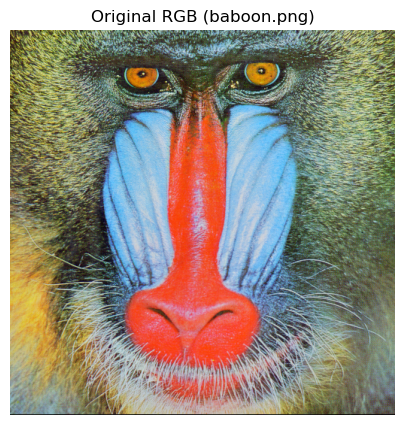

In [18]:

img_path = "baboon.png"
im = Image.open(img_path).convert("RGB")
img = np.array(im, dtype=np.uint8)
plot_image(img, "Original RGB (baboon.png)")


## 2) Channel Histograms (R, G, B)

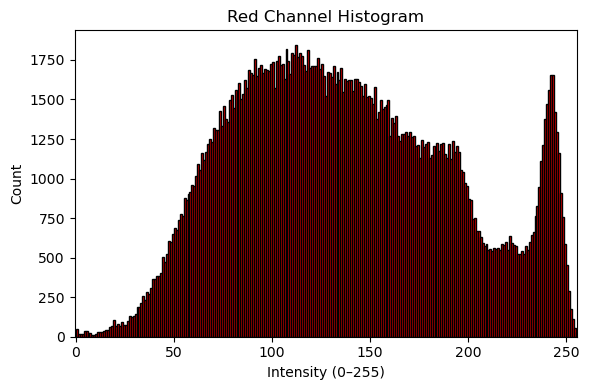

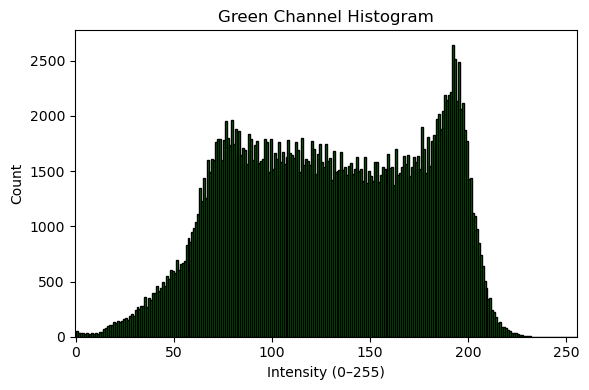

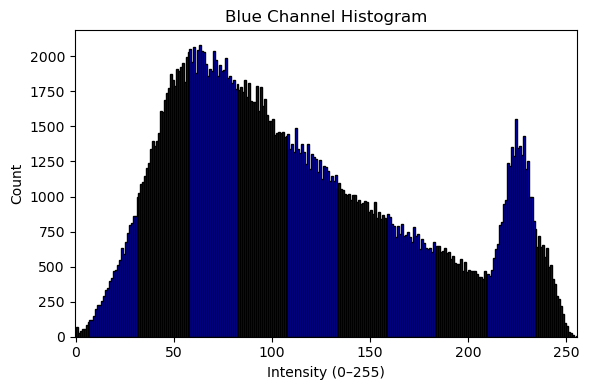

In [19]:

r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
show_histogram(r, "Red Channel Histogram", color='red')
show_histogram(g, "Green Channel Histogram", color='green')
show_histogram(b, "Blue Channel Histogram", color='blue')


## 3) Intensity Transformations — Brightness & Contrast

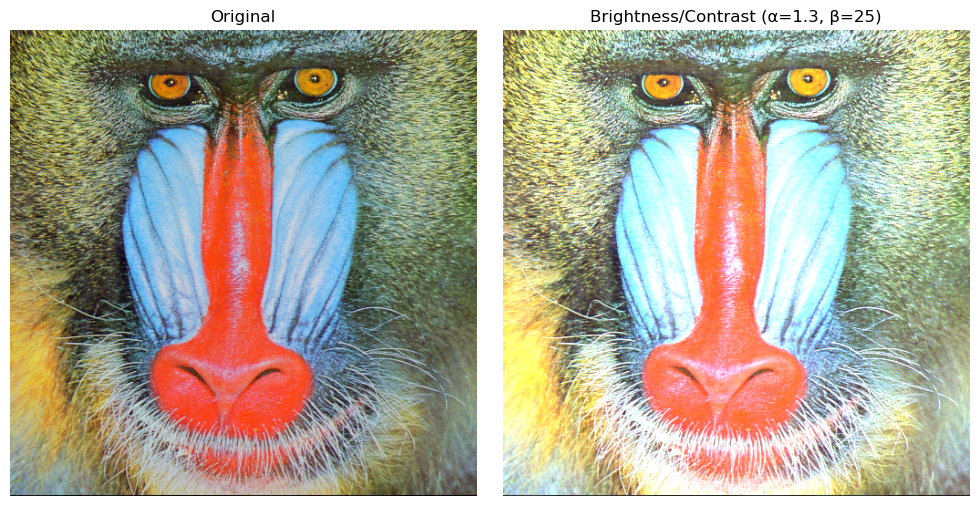

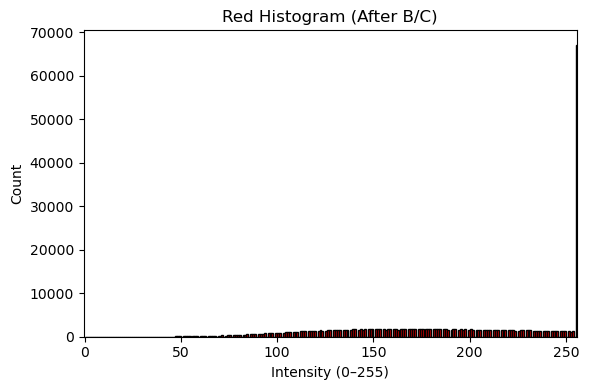

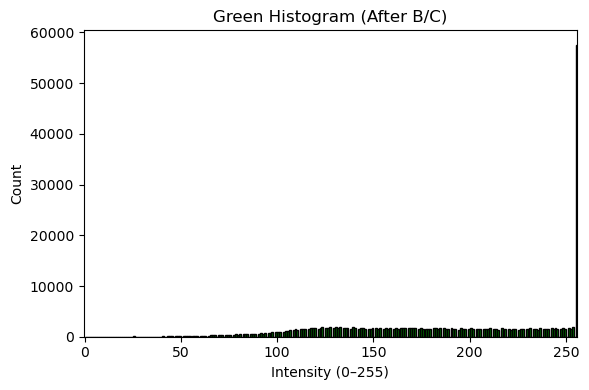

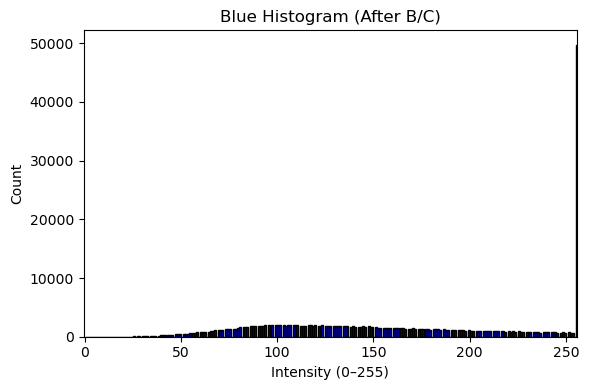

In [21]:

alpha, beta = 1.3, 25  # try different values
img_bc = adjust_brightness_contrast(img, alpha=alpha, beta=beta)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img_bc); plt.title(f"Brightness/Contrast (α={alpha}, β={beta})"); plt.axis("off")
plt.tight_layout(); plt.show()

r2, g2, b2 = img_bc[:,:,0], img_bc[:,:,1], img_bc[:,:,2]
show_histogram(r2, "Red Histogram (After B/C)",color='red')
show_histogram(g2, "Green Histogram (After B/C)",color='green')
show_histogram(b2, "Blue Histogram (After B/C)",color='blue')


## 4) Per-Channel Histogram Equalization

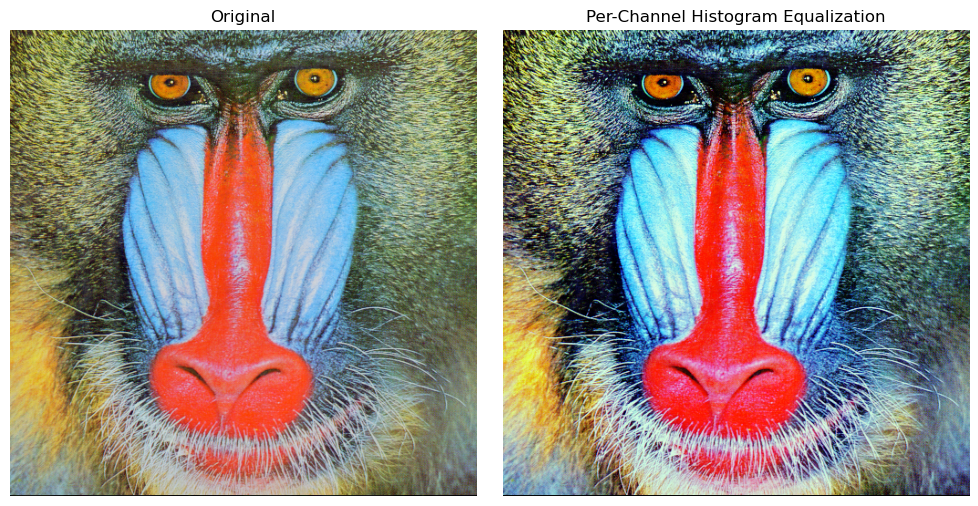

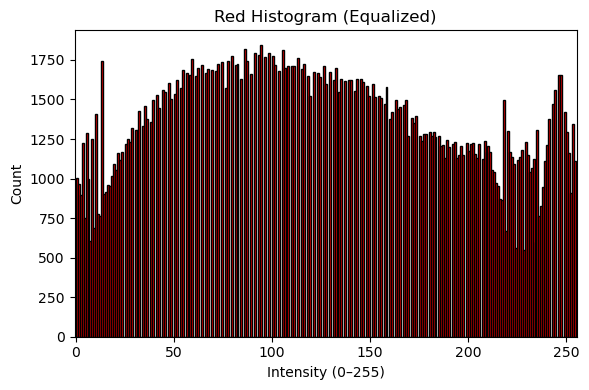

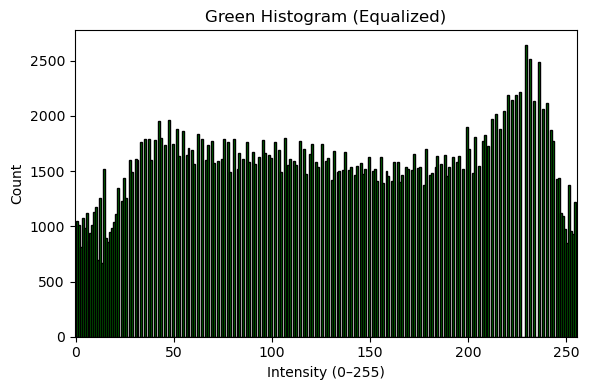

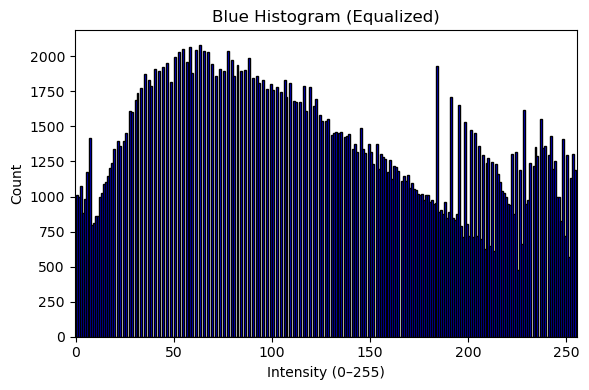

In [23]:

img_eq = rgb_equalize(img)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img_eq); plt.title("Per-Channel Histogram Equalization"); plt.axis("off")
plt.tight_layout(); plt.show()

r_eq, g_eq, b_eq = img_eq[:,:,0], img_eq[:,:,1], img_eq[:,:,2]
show_histogram(r_eq, "Red Histogram (Equalized)",color='red')
show_histogram(g_eq, "Green Histogram (Equalized)",color='green')
show_histogram(b_eq, "Blue Histogram (Equalized)",color='blue')


## 5) Grayscale Conversion + Histogram

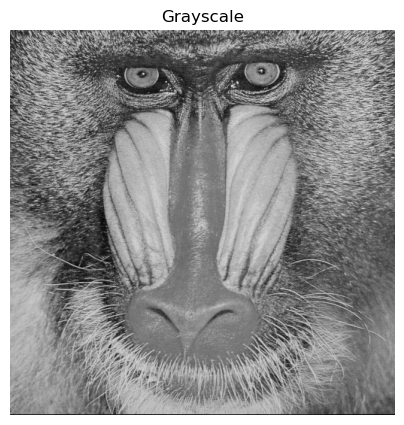

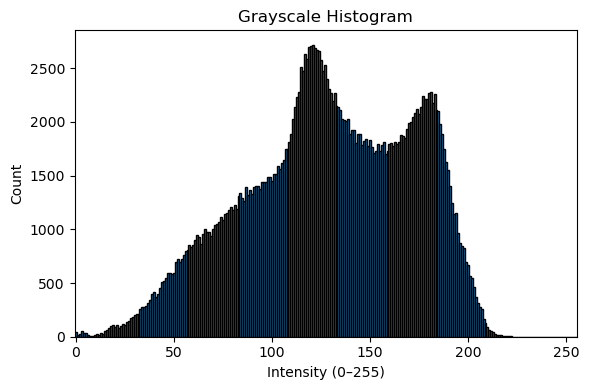

In [7]:

gray = to_grayscale(img)
plot_image(gray, "Grayscale", cmap="gray")
show_histogram(gray, "Grayscale Histogram")


## 6) Otsu's Thresholding

Otsu Threshold: 127


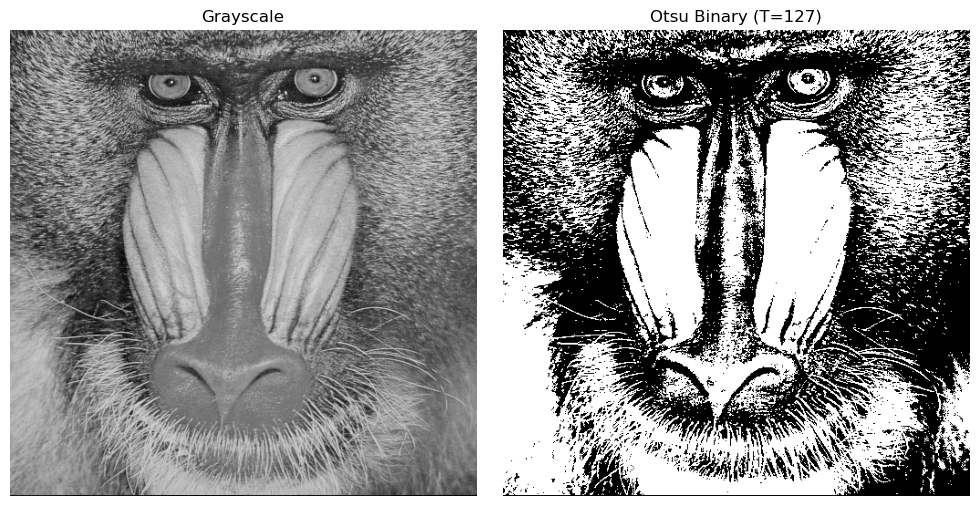

In [8]:

t, binary = otsu_threshold(gray)
print(f"Otsu Threshold: {t}")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(gray, cmap="gray", vmin=0, vmax=255); plt.title("Grayscale"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(binary, cmap="gray", vmin=0, vmax=255); plt.title(f"Otsu Binary (T={t})"); plt.axis("off")
plt.tight_layout(); plt.show()
